<a href="https://colab.research.google.com/github/Trishund/healthcare-dataset-prediction-modle-/blob/main/python/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install conda and rdkit**

In [25]:
!pip install rdkit
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


     |████████████████████████████████| 29.5 MB 1.6 MB/s 


In [7]:
! ls gdrive  "/content/gdrive/MyDrive/Colab Notebooks/data2"

'/content/gdrive/MyDrive/Colab Notebooks/data2':
ascending_standard_values.csv  bioactivity_preprocessed_data.csv
bioactivity_data.csv

gdrive:
MyDrive


## **Load bioactivity data**

In [8]:
import pandas as pd

In [21]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [27]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [28]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [29]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [30]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,234.284,3.13019,4.0,3.0
1,265.254,2.10900,3.0,5.0
2,301.729,3.07810,0.0,3.0
3,306.148,3.72290,0.0,2.0
4,248.311,3.43861,4.0,3.0
...,...,...,...,...
427,490.003,5.52260,1.0,6.0
428,495.957,5.79220,1.0,5.0
429,527.974,6.53280,1.0,5.0
430,528.867,6.82080,1.0,5.0


In [31]:
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL119345,Cc1ccc2[nH]c(O)c(/N=N/C(=N)S)c2c1,43900.0
1,CHEMBL120254,NC(=S)/N=N/c1c(O)[nH]c2ccc([N+](=O)[O-])cc12,4400.0
2,CHEMBL120076,COc1cccc(CN2C(=O)C(=O)c3cc(Cl)ccc32)c1,34600.0
3,CHEMBL333067,O=C1C(=O)N(Cc2ccc(Cl)cc2)c2ccc(Cl)cc21,31200.0
4,CHEMBL118210,Cc1cc(C)c2[nH]c(O)c(/N=N/C(=N)S)c2c1,13200.0
...,...,...,...
427,CHEMBL5624786,COc1ccc(C(c2cccc(OC)c2O)N2CCN(c3ccnc4cc(Cl)ccc...,7100.0
428,CHEMBL5630854,COc1cccc(C(c2ccc(F)c(F)c2)N2CCN(c3ccnc4cc(Cl)c...,10400.0
429,CHEMBL5630121,COc1cccc(C(c2ccc(C(F)(F)F)cc2)N2CCN(c3ccnc4cc(...,5400.0
430,CHEMBL5624599,COc1cccc(C(c2ccc(Cl)c(Cl)c2)N2CCN(c3ccnc4cc(Cl...,4600.0


Now, let's combine the 2 DataFrame

In [45]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [46]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL119345,Cc1ccc2[nH]c(O)c(/N=N/C(=N)S)c2c1,43900.0,234.284,3.13019,4.0,3.0
1,CHEMBL120254,NC(=S)/N=N/c1c(O)[nH]c2ccc([N+](=O)[O-])cc12,4400.0,265.254,2.10900,3.0,5.0
2,CHEMBL120076,COc1cccc(CN2C(=O)C(=O)c3cc(Cl)ccc32)c1,34600.0,301.729,3.07810,0.0,3.0
3,CHEMBL333067,O=C1C(=O)N(Cc2ccc(Cl)cc2)c2ccc(Cl)cc21,31200.0,306.148,3.72290,0.0,2.0
4,CHEMBL118210,Cc1cc(C)c2[nH]c(O)c(/N=N/C(=N)S)c2c1,13200.0,248.311,3.43861,4.0,3.0
...,...,...,...,...,...,...,...
427,CHEMBL5624786,COc1ccc(C(c2cccc(OC)c2O)N2CCN(c3ccnc4cc(Cl)ccc...,7100.0,490.003,5.52260,1.0,6.0
428,CHEMBL5630854,COc1cccc(C(c2ccc(F)c(F)c2)N2CCN(c3ccnc4cc(Cl)c...,10400.0,495.957,5.79220,1.0,5.0
429,CHEMBL5630121,COc1cccc(C(c2ccc(C(F)(F)F)cc2)N2CCN(c3ccnc4cc(...,5400.0,527.974,6.53280,1.0,5.0
430,CHEMBL5624599,COc1cccc(C(c2ccc(Cl)c(Cl)c2)N2CCN(c3ccnc4cc(Cl...,4600.0,528.867,6.82080,1.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [58]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [48]:
df_combined.standard_value.describe()

,standard_value
count,432.000000
mean,20283.899051
std,25110.851562
min,0.360000
25%,2185.000000
50%,8690.000000
75%,31125.000000
max,110000.000000


In [49]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [50]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [53]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [57]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL119345,Cc1ccc2[nH]c(O)c(/N=N/C(=N)S)c2c1,234.284,3.13019,4.0,3.0,43900.0
1,CHEMBL120254,NC(=S)/N=N/c1c(O)[nH]c2ccc([N+](=O)[O-])cc12,265.254,2.10900,3.0,5.0,4400.0
2,CHEMBL120076,COc1cccc(CN2C(=O)C(=O)c3cc(Cl)ccc32)c1,301.729,3.07810,0.0,3.0,34600.0
3,CHEMBL333067,O=C1C(=O)N(Cc2ccc(Cl)cc2)c2ccc(Cl)cc21,306.148,3.72290,0.0,2.0,31200.0
4,CHEMBL118210,Cc1cc(C)c2[nH]c(O)c(/N=N/C(=N)S)c2c1,248.311,3.43861,4.0,3.0,13200.0
...,...,...,...,...,...,...,...
427,CHEMBL5624786,COc1ccc(C(c2cccc(OC)c2O)N2CCN(c3ccnc4cc(Cl)ccc...,490.003,5.52260,1.0,6.0,7100.0
428,CHEMBL5630854,COc1cccc(C(c2ccc(F)c(F)c2)N2CCN(c3ccnc4cc(Cl)c...,495.957,5.79220,1.0,5.0,10400.0
429,CHEMBL5630121,COc1cccc(C(c2ccc(C(F)(F)F)cc2)N2CCN(c3ccnc4cc(...,527.974,6.53280,1.0,5.0,5400.0
430,CHEMBL5624599,COc1cccc(C(c2ccc(Cl)c(Cl)c2)N2CCN(c3ccnc4cc(Cl...,528.867,6.82080,1.0,5.0,4600.0


In [55]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,432.000000
mean,20283.899051
std,25110.851562
min,0.360000
25%,2185.000000
50%,8690.000000
75%,31125.000000
max,110000.000000


In [59]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL119345,Cc1ccc2[nH]c(O)c(/N=N/C(=N)S)c2c1,234.284,3.13019,4.0,3.0,4.357535
1,CHEMBL120254,NC(=S)/N=N/c1c(O)[nH]c2ccc([N+](=O)[O-])cc12,265.254,2.10900,3.0,5.0,5.356547
2,CHEMBL120076,COc1cccc(CN2C(=O)C(=O)c3cc(Cl)ccc32)c1,301.729,3.07810,0.0,3.0,4.460924
3,CHEMBL333067,O=C1C(=O)N(Cc2ccc(Cl)cc2)c2ccc(Cl)cc21,306.148,3.72290,0.0,2.0,4.505845
4,CHEMBL118210,Cc1cc(C)c2[nH]c(O)c(/N=N/C(=N)S)c2c1,248.311,3.43861,4.0,3.0,4.879426
...,...,...,...,...,...,...,...
427,CHEMBL5624786,COc1ccc(C(c2cccc(OC)c2O)N2CCN(c3ccnc4cc(Cl)ccc...,490.003,5.52260,1.0,6.0,5.148742
428,CHEMBL5630854,COc1cccc(C(c2ccc(F)c(F)c2)N2CCN(c3ccnc4cc(Cl)c...,495.957,5.79220,1.0,5.0,4.982967
429,CHEMBL5630121,COc1cccc(C(c2ccc(C(F)(F)F)cc2)N2CCN(c3ccnc4cc(...,527.974,6.53280,1.0,5.0,5.267606
430,CHEMBL5624599,COc1cccc(C(c2ccc(Cl)c(Cl)c2)N2CCN(c3ccnc4cc(Cl...,528.867,6.82080,1.0,5.0,5.337242


In [60]:
df_final.pIC50.describe()

,pIC50
count,432.000000
mean,5.359927
std,1.178981
min,3.958607
25%,4.506891
50%,5.060981
75%,5.660580
max,9.443697


### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [62]:
# Define bioactivity classes based on pIC50 values
def assign_bioactivity_class(row):
    if row['pIC50'] >= 6:
        return 'active'
    elif row['pIC50'] <= 5:
        return 'inactive'
    else:
        return 'intermediate'

df_final['bioactivity_class'] = df_final.apply(assign_bioactivity_class, axis=1)

df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50,bioactivity_class
0,CHEMBL119345,Cc1ccc2[nH]c(O)c(/N=N/C(=N)S)c2c1,234.284,3.13019,4.0,3.0,4.357535,inactive
2,CHEMBL120076,COc1cccc(CN2C(=O)C(=O)c3cc(Cl)ccc32)c1,301.729,3.07810,0.0,3.0,4.460924,inactive
3,CHEMBL333067,O=C1C(=O)N(Cc2ccc(Cl)cc2)c2ccc(Cl)cc21,306.148,3.72290,0.0,2.0,4.505845,inactive
4,CHEMBL118210,Cc1cc(C)c2[nH]c(O)c(/N=N/C(=N)S)c2c1,248.311,3.43861,4.0,3.0,4.879426,inactive
5,CHEMBL324722,COc1cccc(CN2C(=O)C(=O)c3cc(C)ccc32)c1,281.311,2.73312,0.0,3.0,4.659556,inactive
...,...,...,...,...,...,...,...,...
419,CHEMBL5406869,Fc1ccc(-n2cc(COc3ccnc4cc(Cl)ccc34)nn2)cc1F,372.762,4.32610,0.0,5.0,4.591082,inactive
420,CHEMBL5424800,O=[N+]([O-])c1ccc(-n2cc(COc3ccnc4cc(Cl)ccc34)n...,381.779,3.95610,0.0,7.0,4.791559,inactive
422,CHEMBL5563817,O=[N+]([O-])c1ccc(-n2cc(COc3cccc4nc(Cl)ccc34)n...,381.779,3.95610,0.0,7.0,4.791559,inactive
428,CHEMBL5630854,COc1cccc(C(c2ccc(F)c(F)c2)N2CCN(c3ccnc4cc(Cl)c...,495.957,5.79220,1.0,5.0,4.982967,inactive


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [68]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

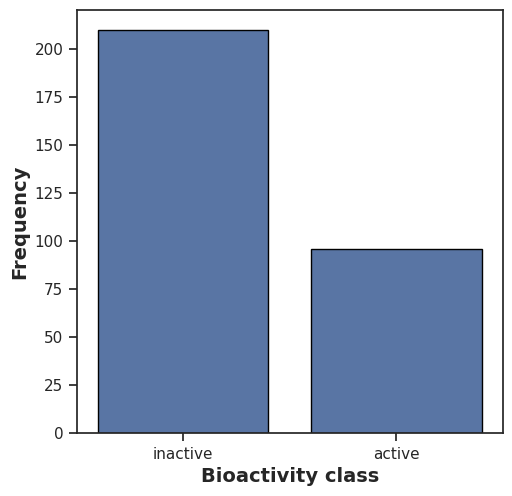

In [89]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

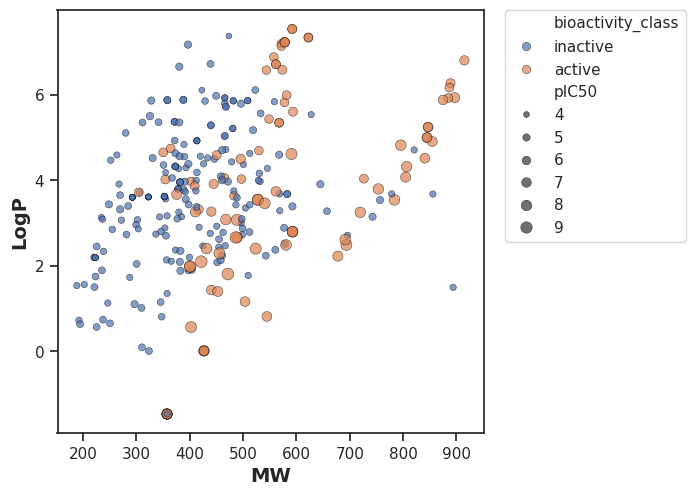

In [81]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

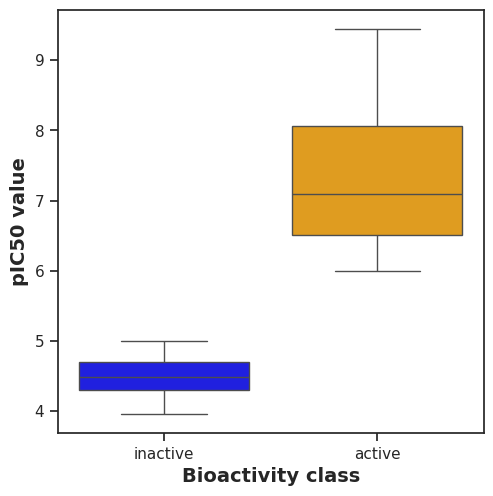

In [90]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, palette={'active': 'orange', 'inactive': 'blue'})

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [91]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [92]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,20160.0,5.586552e-45,0.05,Different distribution (reject H0)


#### **MW**

/tmp/ipython-input-544169365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, palette={'active': 'orange', 'inactive': 'blue'})


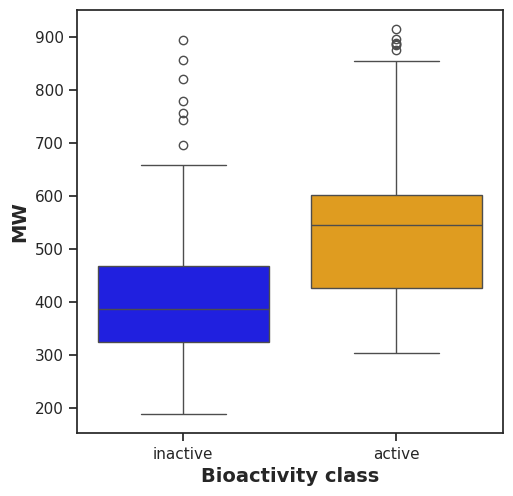

In [93]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, palette={'active': 'orange', 'inactive': 'blue'})

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [94]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,15763.5,2.503902e-15,0.05,Different distribution (reject H0)


#### **LogP**

/tmp/ipython-input-3585740119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, palette={'active': 'orange', 'inactive': 'blue'})


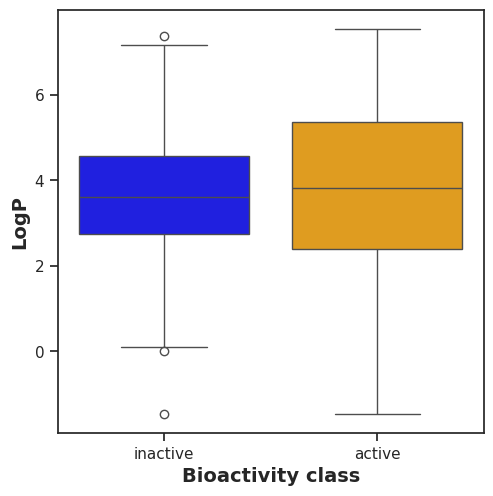

In [95]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, palette={'active': 'orange', 'inactive': 'blue'})

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [76]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,10692.5,0.394104,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

/tmp/ipython-input-815368707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, palette={'active': 'orange', 'inactive': 'blue'})


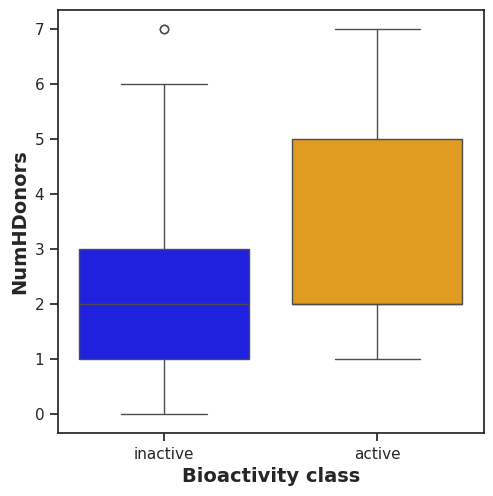

In [87]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, palette={'active': 'orange', 'inactive': 'blue'})

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [78]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,14240.0,3.307581e-09,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

/tmp/ipython-input-136235184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, palette={'active': 'orange', 'inactive': 'blue'})


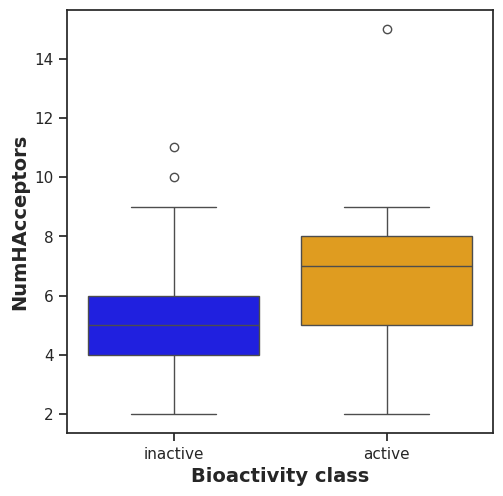

In [88]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, palette={'active': 'orange', 'inactive': 'blue'})

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [80]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,14655.0,8.687326e-11,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Interpretation of Box Plots
pIC50 Values

The distribution of pIC50 values between the active and inactive **compounds reveals a clear and statistically significant separation**. This is consistent with the activity thresholds applied during dataset classification, where compounds with IC₅₀ < 1,000 nM (pIC₅₀ > 6) were categorized as active, while those with IC₅₀ > 10,000 nM (pIC₅₀ < 5) were classified as inactive. The box plot visually confirms this distinction, showing that the active class is shifted toward higher pIC₅₀ values, while the inactive class occupies a markedly lower pIC₅₀ range. The minimal overlap between the interquartile ranges further supports the robustness of this classification and indicates that pIC50 is a strong discriminator of biological activity in this dataset.

Lipinski’s Descriptors

Evaluation of the four Lipinski parameters—Molecular Weight (MW), LogP, Number of Hydrogen Bond Donors (NumHDonors), and Number of Hydrogen Bond Acceptors (NumHAcceptors)—shows distinct patterns when comparing active and inactive compounds.

Among the descriptors, **LogP is the only parameter that does not exhibit a statistically meaningful difference between the two activity classes.** This suggests that **lipophilicity alone does not significantly influence the activity profile within this chemical space.** In contrast, the remaining three descriptors—MW, NumHDonors, and NumHAcceptors—demonstrate clear and statistically significant differences between actives and inactives. Actives tend to fall within narrower, more optimized ranges for these parameters, reflecting the structural and physicochemical requirements for enhanced binding affinity and interaction with the biological target. The box plots highlight these disparities, indicating that these descriptors may serve as useful indicators for predicting compound activity.

## **Zip files**

In [96]:
! zip -r results.zip . -i *.csv *.pdf

Scanning files ..
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_MW_vs_LogP.pdf (deflated 8%)
  adding: mannwhitneyu_pIC50.csv (deflated 12%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: bioactivity_preprocessed_data.csv (deflated 82%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
